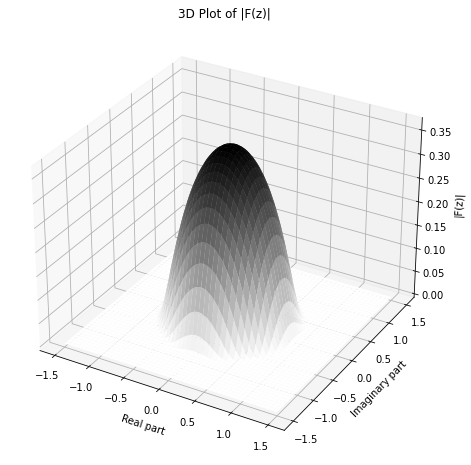

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function F(z)
def F(z):
    if np.abs(z) < 1:
        return np.exp(-1 / (1 - np.abs(z)**2))
    else:
        return 0

# Create a meshgrid for the complex plane
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Apply the function to each point in the meshgrid
FZ = np.zeros_like(Z)
for i in range(len(x)):
    for j in range(len(y)):
        FZ[i, j] = F(Z[i, j])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, np.abs(FZ), cmap='binary')

ax.set_xlabel('Real part')
ax.set_ylabel('Imaginary part')
ax.set_zlabel('|F(z)|')
ax.set_title('3D Plot of |F(z)|')

plt.savefig('bump_function.png', dpi=300)
plt.show()


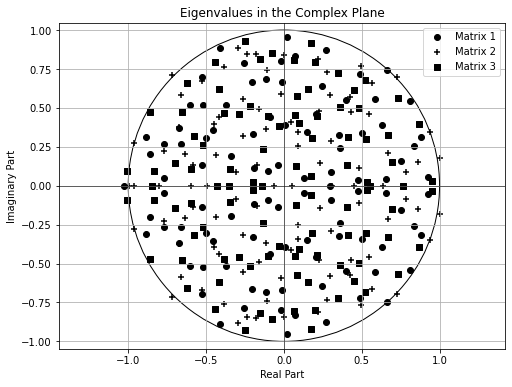

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_normalized_eigenvalues(n, mu, var):
    """
    Generate normalized eigenvalues of an iid random matrix with Gaussian random entries.

    Parameters:
    n (int): Size of the matrix.
    mu (float): Mean of the Gaussian distribution.
    var (float): Variance of the Gaussian distribution.

    Returns:
    np.ndarray: Array of complex-valued eigenvalues.
    """
    # Create a matrix with Gaussian random entries
    matrix = np.random.normal(mu, np.sqrt(var), (n, n))
    # Normalize the matrix
    matrix /= np.sqrt(n)
    # Compute and return the eigenvalues
    return np.linalg.eigvals(matrix)

def plot_eigenvalues_with_circle(eigenvalues_list):
    """
    Plot eigenvalues on the complex plane with a unit circle.

    Parameters:
    eigenvalues_list (list of np.ndarray): List of arrays of eigenvalues from different matrices.
    """
    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Different markers for different matrices
    markers = ['o', '+', 's', 'x', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'D', 'd', '|', '_']

    for i, eigenvalues in enumerate(eigenvalues_list):
        plt.scatter(eigenvalues.real, eigenvalues.imag, marker=markers[i % len(markers)], label=f'Matrix {i+1}', color='black')

    # Draw a unit circle
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)

    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Eigenvalues in the Complex Plane')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.axis('equal')  # Ensures the aspect ratio is equal
    plt.savefig('spectrum.png', dpi=300)
    plt.show()

# Run with N=100, P=3, mu=0, var=1
N = 100
P = 3
mu = 0
var = 1

# Generate normalized eigenvalues for P matrices
eigenvalues_list = [generate_normalized_eigenvalues(N, mu, var) for _ in range(P)]
plot_eigenvalues_with_circle(eigenvalues_list)


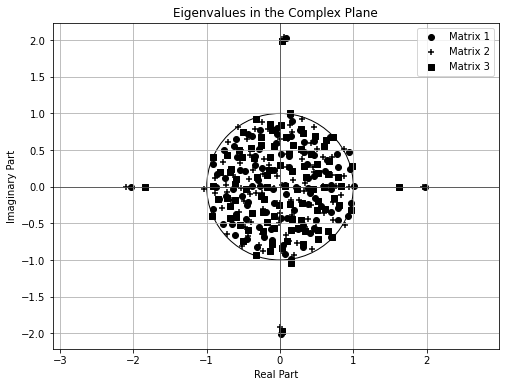

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def generate_normalized_eigenvalues(n, mu, var):
    """
    Generate normalized eigenvalues of an iid random matrix with Gaussian random entries.
    """
    matrix = np.random.normal(mu, np.sqrt(var), (n, n))
    matrix /= np.sqrt(n)
    return np.linalg.eigvals(matrix)

def generate_perturbed_eigenvalues(n, mu, var, A_n):
    """
    Generate eigenvalues of a perturbed iid random matrix with Gaussian random entries and a specific perturbation matrix.
    """
    X_n = np.random.normal(mu, np.sqrt(var), (n, n))
    X_n /= np.sqrt(n)
    perturbed_matrix = X_n + A_n
    return np.linalg.eigvals(perturbed_matrix)

def generate_eigenvalues(A_n):
    return np.linalg.eigvals(A_n)

def plot_eigenvalues_with_circle(eigenvalues_list):
    """
    Plot eigenvalues on the complex plane with a unit circle.
    """
    plt.figure(figsize=(8, 6))
    markers = ['o', '+', 's', 'x', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'D', 'd', '|', '_']
    for i, eigenvalues in enumerate(eigenvalues_list):
        plt.scatter(eigenvalues.real, eigenvalues.imag, marker=markers[i % len(markers)], label=f'Matrix {i+1}', color='black')
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    plt.gca().add_artist(circle)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Eigenvalues in the Complex Plane')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.savefig('spectrum.png', dpi=300)
    plt.show()

# Parameters
N = 100
P = 3
mu = 0
var = 1

# Define the perturbation matrix A_n
diagonal_entries = [2,-2,2j,-2j] + [0] * (N - 4)
A_n = np.diag(diagonal_entries)

# Generate perturbed eigenvalues for P matrices
perturbed_eigenvalues_list = [generate_perturbed_eigenvalues(N, mu, var, A_n) for _ in range(P)]
plot_eigenvalues_with_circle(perturbed_eigenvalues_list)

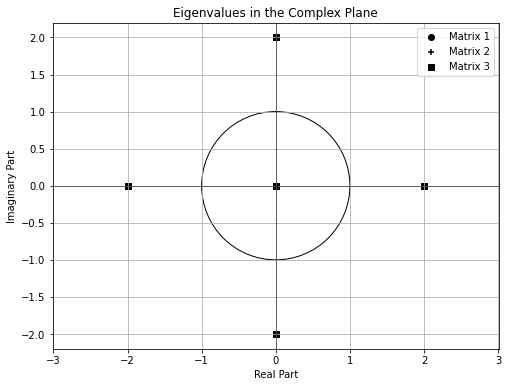

In [33]:
perturbed_eigenvalues_list = [generate_eigenvalues(A_n) for _ in range(P)]
plot_eigenvalues_with_circle(perturbed_eigenvalues_list)

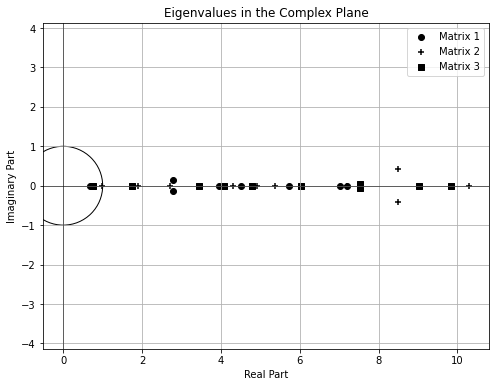

In [51]:
# Parameters
N = 10
P = 3
mu = 0
var = 1

# Define the perturbation matrix A_n with unbounded operator norm
A_n_unbounded = np.diag(np.arange(1, N + 1))

# Generate perturbed eigenvalues for P matrices with the unbounded A_n
perturbed_eigenvalues_unbounded_list = [generate_perturbed_eigenvalues(N, mu, var, A_n_unbounded) for _ in range(P)]
plot_eigenvalues_with_circle(perturbed_eigenvalues_unbounded_list)

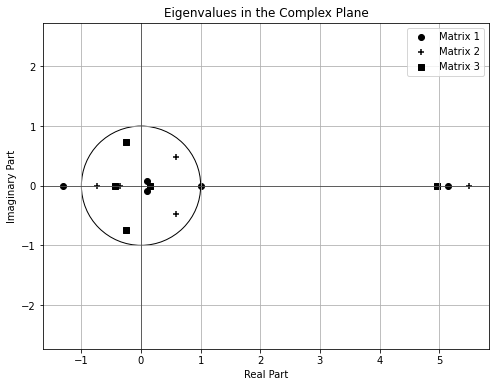

In [67]:
# Parameters
N = 5
P = 3
mu = 0
var = 1

diagonal_entries = [N] + [0] * (N - 1)
A_n = np.diag(diagonal_entries)

# Generate perturbed eigenvalues for P matrices with the unbounded A_n
perturbed_eigenvalues_unbounded_list = [generate_perturbed_eigenvalues(N, mu, var, A_n) for _ in range(P)]
plot_eigenvalues_with_circle(perturbed_eigenvalues_unbounded_list)

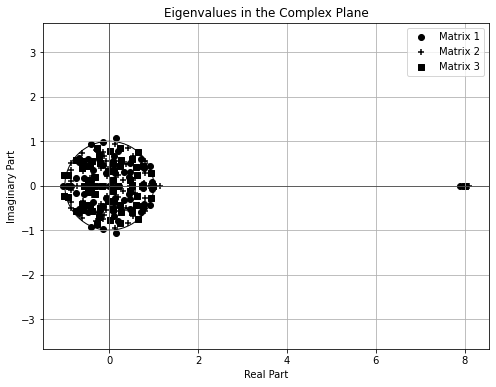

In [88]:
# Parameters
N = 64
P = 3
mu = 1
var = 1

diagonal_entries = [0] * (N)
A_n = np.diag(diagonal_entries)

# Generate perturbed eigenvalues for P matrices with the unbounded A_n
perturbed_eigenvalues_unbounded_list = [generate_perturbed_eigenvalues(N, mu, var, A_n) for _ in range(P)]
plot_eigenvalues_with_circle(perturbed_eigenvalues_unbounded_list)